## Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import timeit


## Step 2: Load and Prepare the Data

Loading Data: Two datasets are loaded. The first one, data, is the original dataset containing sensor readings and activity labels. The second, data2, is a version of the dataset that has been transformed using Principal Component Analysis (PCA) to reduce its dimensionality while retaining most of the variance.
Separating Features and Target: The datasets are split into features (X) and the target variable (Y). The features are the data points we use to predict the outcome, and the target variable is the outcome we aim to predict, which in this case is the type of activity.

In [2]:
# Load the original dataset
data = pd.read_csv('sportsdata.txt', delimiter=',')

# Separate features and the target variable
X = data.drop(['Activity'], axis=1)
Y = data['Activity']

# Load the PCA-transformed data
data2 = pd.read_csv('sportsdataPCA2.txt', delimiter=',')


In [3]:
data2.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,...,Attribute 41,Attribute 42,Attribute 43,Attribute 44,Attribute 45,Attribute 46,Attribute 47,Attribute 48,Attribute 49,Attribute 50
0,-1.637071,-0.838735,3.347988,-9.458428,-7.743542,-23.807102,-9.581168,-7.642276,-11.361545,-0.266467,...,-0.547800,0.639038,-0.130482,0.972410,0.702123,-0.869818,-2.207713,0.877193,-3.156511,1.806056
1,-1.749408,-0.970375,3.377247,-9.282271,-7.725263,-23.857871,-9.762795,-7.540563,-11.318305,-0.268323,...,-0.425918,0.638675,-0.017379,0.786193,0.700216,-0.943424,-2.427327,1.067304,-3.060608,1.808786
2,-1.748035,-1.016446,3.374029,-9.110532,-7.734951,-23.876501,-9.873329,-7.561801,-11.326530,-0.282362,...,-0.503253,0.681284,-0.033415,0.815174,0.701261,-0.934168,-2.360113,0.995595,-3.062268,1.793928
3,-1.700473,-1.116532,3.374351,-9.011856,-7.627430,-23.929857,-9.868561,-7.549670,-11.321523,-0.296493,...,-0.528903,0.657862,-0.055132,0.803482,0.681714,-0.918067,-2.366341,0.949021,-3.058765,1.768034
4,-1.590936,-1.198873,3.333404,-8.908969,-7.557410,-23.990856,-9.868686,-7.565691,-11.325637,-0.277032,...,-0.455622,0.665302,-0.043626,0.851352,0.689380,-0.877285,-2.284260,0.939674,-3.061137,1.799051


## Step 3: Model Training and Evaluation

A function named train_evaluate_model is defined to streamline the process of training models and evaluating their performance. This function performs the following tasks:

Cross-validation: This technique assesses how the models will perform in practice. It splits the data into several parts, trains the model on some parts, tests it on the remaining, and rotates this process a number of times (10 folds in this case).

Confusion Matrix: After making predictions, a confusion matrix is created to visualize the accuracy of predictions across different activities. It shows how many predictions for each activity are correct and how many are misclassified.

Visualization: A heatmap is generated from the confusion matrix to provide a visual representation of the model's performance, making it easier to identify which activities are correctly classified and which are not.

In [4]:
def train_evaluate_model(model, X, Y, model_name):
    start = timeit.default_timer()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, Y, cv=10)
    print(f"{model_name} Accuracy: {scores.mean():0.2f} (+/- {scores.std() * 2:0.2f})")
    
    
    # Predict and calculate the confusion matrix
    y_pred = cross_val_predict(model, X, Y, cv=10)
    conf_mat = confusion_matrix(Y, y_pred)
    print(conf_mat)
    
    
    # Visualization
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    stop = timeit.default_timer()
    print(f"Time: {stop - start:0.4f} seconds")
    
    

## Step 4: Train and Evaluate Models

### K-Nearest Neighbors

K-Nearest Neighbor Accuracy: 0.92 (+/- 0.06)
[[480   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 446  34   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 128 348   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    4]
 [  0   4   2 473   0   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 479   0   0   0   0   0   0   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 480   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  3   0   0   0   0   0   0 467   0   0   0   0   0   0   3   0   5   2
    0]
 [  0   0   0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 432   0  18   0   0   0   8  19   3
    0]
 [  0   5   1   1  72   1   0   0   0   1 265  22   0   0  10  11  26  59
    6]
 [  0   0   0   0   0   0   0   0   0   0   0 448   0   0   0   

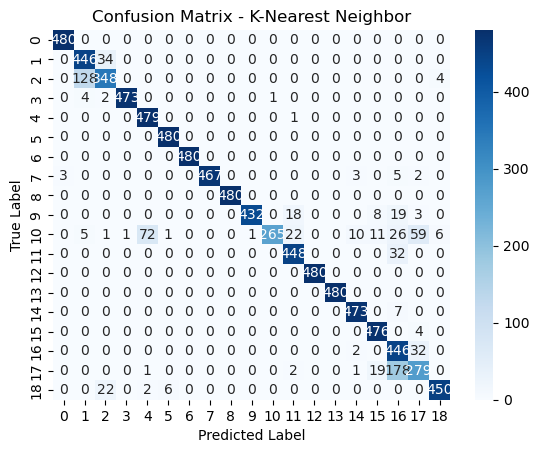

Time: 3.9903 seconds


In [5]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=6, weights='distance')
train_evaluate_model(knn_model, data2, Y, "K-Nearest Neighbor")


### Support Vector Machine

SVM Linear Accuracy: 0.92 (+/- 0.08)
[[480   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 446   8  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  10 462   1   0   0   0   0   0   0   0   6   0   0   0   0   0   0
    1]
 [  0  18   3 459   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 479   0   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0 479   0   0   0   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  3   0   0   0   0   0   0 467   0   0   0   0   0   0   9   0   1   0
    0]
 [  0   0   0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0 413  17  13   0   0   4   1  13  17
    2]
 [  0   0   5   0  19   0   0   0   0   9 409   3   0   0   2   0   0  25
    8]
 [  0   0   0   0   0   0   0   0   0  39   0 436   0   0   0   0   5   

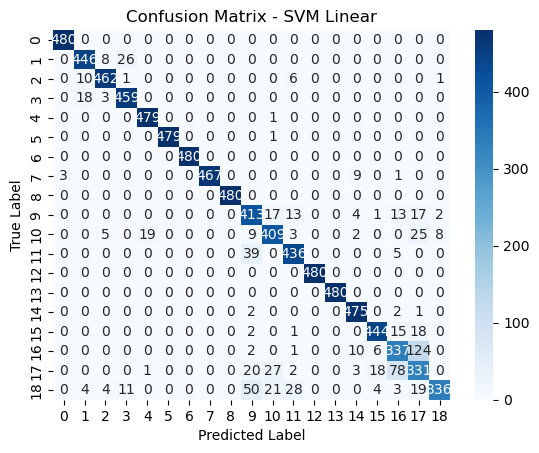

Time: 55.1119 seconds


In [6]:
# SVM with linear kernel
svm_model_linear = SVC(random_state=42, kernel='linear')
train_evaluate_model(svm_model_linear, data2, Y, "SVM Linear")


## Random Forest Classifier

Random Forest Accuracy: 0.93 (+/- 0.08)
[[473   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0 446  34   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1  46 402   0   2   8   0   0   0   0  17   0   0   0   0   0   2   0
    2]
 [  0   2   0 471   0   0   0   0   0   0   7   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 468   4   0   0   0   1   7   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1 477   0   0   0   0   2   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   0   2   0   0   2   2 463   0   2   3   0   0   0   0   0   0   5
    0]
 [  0   0   0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0
    0]
 [  0   2   1   2   0   0   0   1   0 433  16   0   0   0   3  11   2   6
    3]
 [  0   3   2  16  26   3   0   1   0  12 400   0   0   0   1   2   1  11
    2]
 [  0   0   0   0   0   0   0   0   0   1   9 416   0   0   5   0  26

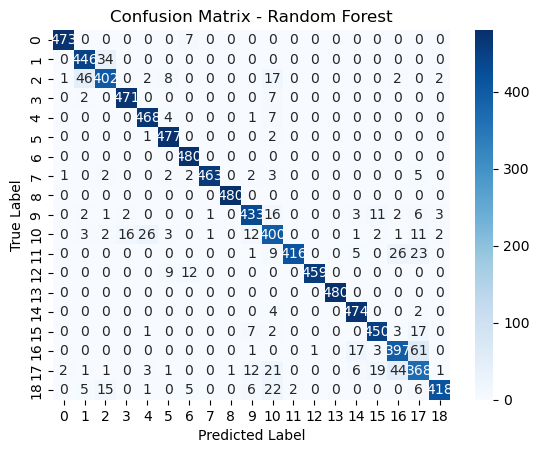

Time: 53.7846 seconds


In [7]:
rf_model = RandomForestClassifier(n_estimators=10,random_state=42)
train_evaluate_model(rf_model, data2, Y, "Random Forest")


### Desicion Tree

Decision Tree Accuracy: 0.85 (+/- 0.06)
[[387   0   0   2   0   0  16  26   0   0   2   0  24   0   0   0   0  23
    0]
 [  0 410  61   7   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    0]
 [  0  66 345   3   4   0   0   0   0  28  18   2   0   0   3   0   0   0
   11]
 [  0   7  47 402   0   0   0   0   0   0  14   7   0   0   3   0   0   0
    0]
 [  1   0   3   0 413   4   0   1   0   0  45   3   0   0   5   0   0   2
    3]
 [  1   2   2   2   6 464   0   0   0   0   1   0   0   0   0   0   2   0
    0]
 [  3   0   0   0   0   0 446   0   0   0   0   0  31   0   0   0   0   0
    0]
 [  0   1   0   1   0   0   3 457   0   4   8   0   0   0   3   0   0   3
    0]
 [  0   0   0   0   0   0   0   0 480   0   0   0   0   0   0   0   0   0
    0]
 [  0   3   1   0   0   1   0   0   0 408   0  10   0   0   9  15  12  19
    2]
 [  3   5   1   9  15   4   1   8   0   7 344   3   0   0   7   2  11  56
    4]
 [  0  17   6   0   0   0   0   0   0   3  12 423   0   0   5   0   0

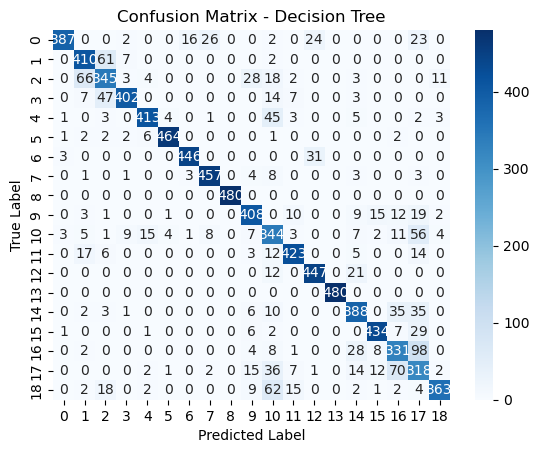

Time: 38.9147 seconds


In [8]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
train_evaluate_model(dt_model, data2, Y, "Decision Tree")


Each model is trained and evaluated using the PCA-transformed dataset (data2) and the target variable (Y). The accuracy of each model is calculated using cross-validation and stored in a dictionary (results_dict).

In [9]:
results_dict = {}  # Initialize the results_dict to store accuracy scores 

# Model Training and Evaluation
models = {
    "K-Nearest Neighbor": knn_model,
    "Support Vector Machine": svm_model_linear,  
    "Decision Tree": dt_model,
    "Random Forest": rf_model
}

for model_name, model in models.items():
    scores = cross_val_score(model, data2, Y, cv=10)
    results_dict[model_name] = np.mean(scores)



Finally, the accuracy scores of all models are compiled into a DataFrame (acc_test) and visualized using a bar plot. This step compares the performance of the models side by side, showing which model achieves the highest accuracy in classifying activities based on the sensor data.

In [10]:
# Create the DataFrame
acc_data = {'Algorithm': list(results_dict.keys()),
            'accuracy_score': list(results_dict.values())}
acc_test = pd.DataFrame(acc_data)
acc_test

,Algorithm,accuracy_score
0,K-Nearest Neighbor,0.916886
1,Support Vector Machine,0.918092
2,Decision Tree,0.848684
3,Random Forest,0.927083


###  The plot which shows all the algorithms applied along with the accuracies achieved

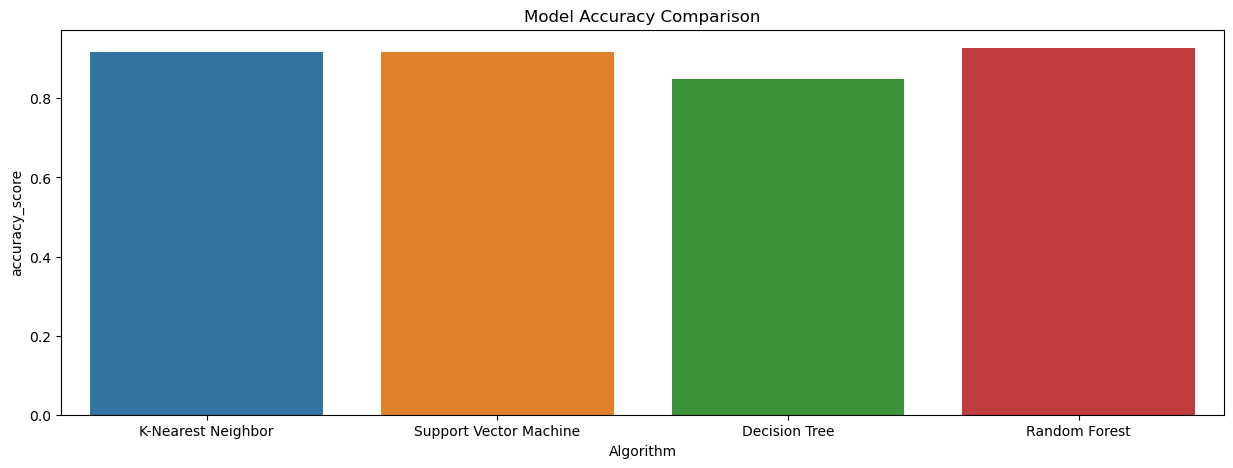

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(data=acc_test, x="Algorithm", y="accuracy_score")
plt.title("Model Accuracy Comparison")  
plt.show()